# Assignment 1 - CE 716 (14 Feb 2020)

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import PIL

### Data Loading

In [2]:
data = gdal.Open('VOL-ALPSRP074050510-H1.1__A')

### Part 1 - Intensity  Image and Phase Image of Hometown

In [9]:
HH,HV = data.ReadAsArray()                 # HH and HV directly assigned as there are only 2 layers in data
print(HH.shape)
amplitude = np.absolute(HH)**2             # Aplitude after getting mod of complex numbert square gives intenisty
# amplitude = np.log(amplitude)
phase = np.angle(HH,deg = True)            # Getting phase from HB layer
amplitude = amplitude[9000:11000,2000:2500]# Croping the image of interest
phase = phase[9000:11000,2000:2500]

(18432, 4640)


In [4]:
amplitude.shape                            # New shape of image for better resolution

(2000, 500)

In [5]:
# HH = (HH - np.mean(HH)) / np.std(HH)     # Normalisation 

### Plotting the Final Image

(2000, 500)
(2000, 500)


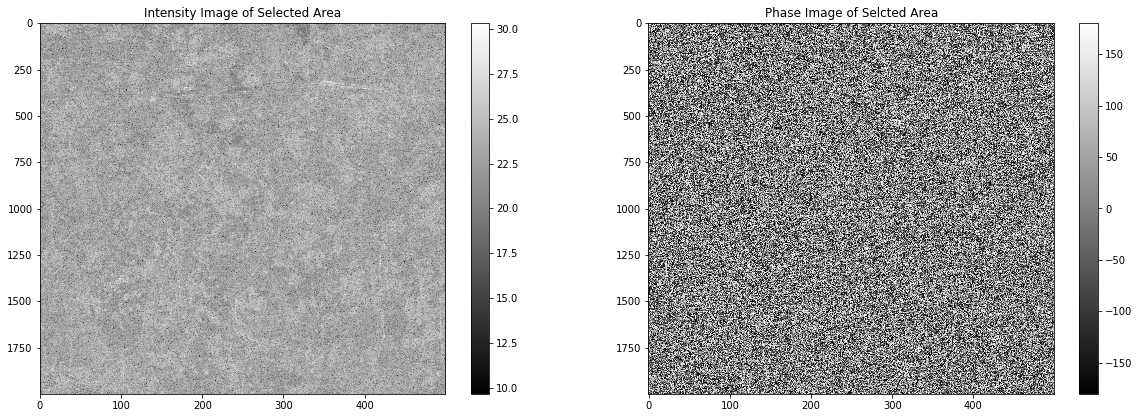

In [6]:
print(amplitude.shape)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area")
plt.imshow(amplitude,cmap = "gray", aspect='auto')
plt.colorbar()

print(phase.shape)
plt.subplot(2,2,2)
plt.title("Phase Image of Selcted Area")
plt.imshow(phase ,cmap = "gray",aspect='auto')
plt.colorbar()

### Part 2 -  Radiometric Resolution

- Radiometric resolution refers to how much information is in a pixel and is expressed in units of bits <br>
- A radiometric resolution of 11 means the pixel has 2048 possible intensities of gary <br>
- The data type of complex AlOS PALSAR is **complex64** Complex number, represented by **two 32-bit floats**

So we can say that Amplitude of resultant will also be a 32 bit number hence giving us the 32 as its Radiometric resolution

### Part 3 -  Multi-looking image

In [7]:
def MultiLook(im,multlook_factor = 5):     # taking the multi-look factor for ALOS PALSAR to be 5
    
    new_im = np.arange(int(im.shape[0]/multlook_factor)*im.shape[1]).reshape(int(im.shape[0]/multlook_factor),im.shape[1])
    for y in range(0,im.shape[1]):
        pos = 0
        for x in range(0,im.shape[0],multlook_factor):
            temp = np.mean(im[x:x+multlook_factor,y])
            
            try:
                new_im[pos,y] = temp
            except IndexError:
                pass
            
            pos+=1
            
    return new_im    

### Printing image after Multi-looking

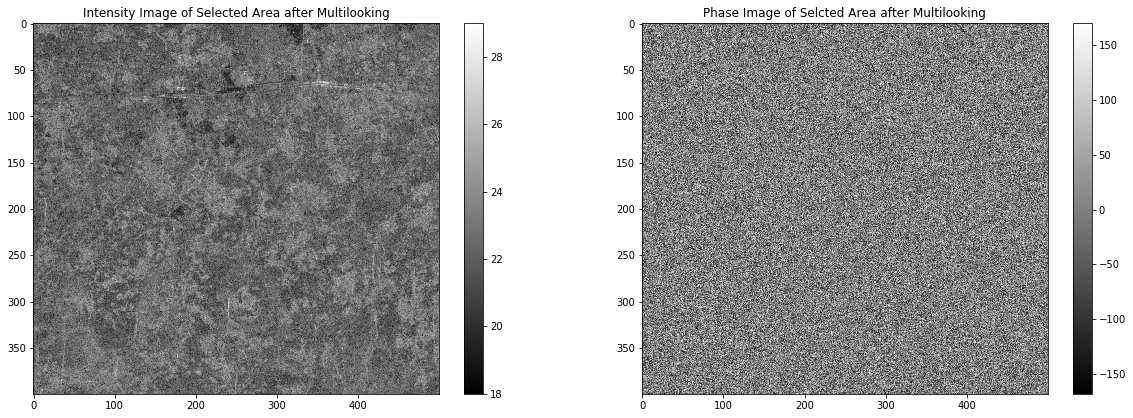

In [8]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area after Multilooking")
plt.imshow(MultiLook(amplitude),cmap = "gray", aspect='auto')
plt.colorbar()

plt.subplot(2,2,2)
plt.title("Phase Image of Selcted Area after Multilooking")
plt.imshow(MultiLook(phase) ,cmap = "gray",aspect='auto')
plt.colorbar()

### RGB

In [111]:
sigmaHH = 10*np.log10(0.001 + MultiLook(amplitude)) -115
sigmaHV = 10*np.log10(0.001 + MultiLook((np.absolute(HV)**2)[9000:11000,2000:2500])) - 115
sigmaRAT = sigmaHH - sigmaHV

In [112]:
sigmaHH = (sigmaHH- np.min(sigmaHH)) / np.ptp(sigmaHH)
sigmaHV = (sigmaHV- np.min(sigmaHV)) / np.ptp(sigmaHV)
sigmaRAT = (sigmaRAT- np.min(sigmaRAT)) / np.ptp(sigmaRAT)

In [113]:
rgb = np.dstack((sigmaHH,sigmaHV,sigmaRAT))
rgb.shape

(400, 500, 3)

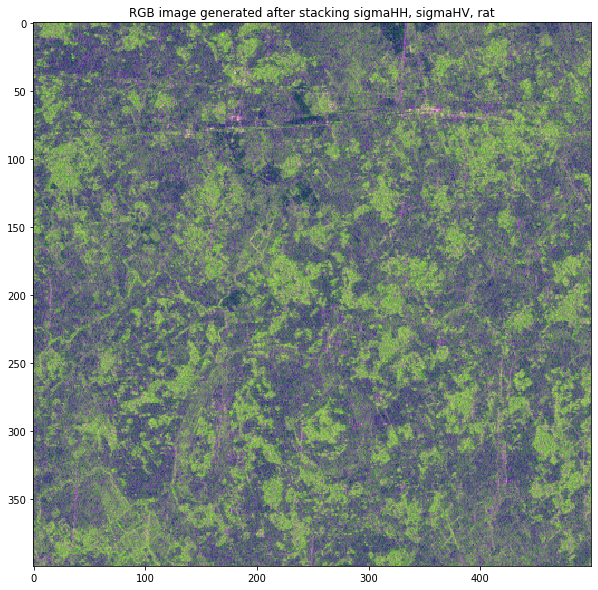

In [116]:
plt.figure(figsize=(10,10))
plt.title("RGB image generated after stacking sigmaHH, sigmaHV, rat")
plt.imshow(rgb,aspect = "auto")